# Titanic

In [ ]:
#   좌석등급    1등석여부   2등석여부   3등석여부
#   1           1           0           0
#   2           0           1           0
#   3           0           0           1

# sigmoid 결과값 : 0.0~1.0

In [12]:
import pandas as pd

#데이터 로딩
df = pd.read_csv('c:/workspace3/data/train3.csv')

df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [13]:
df

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,27.0,0,0,13.0000
887,1,1,0,0,0,1,19.0,0,0,30.0000
888,0,0,0,1,0,1,30.0,1,2,23.4500
889,1,1,0,0,1,0,26.0,0,0,30.0000


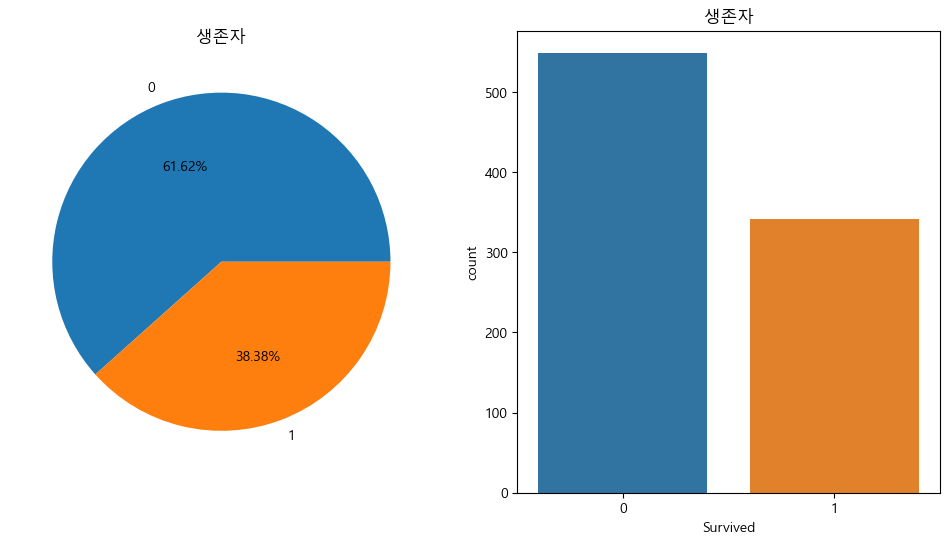

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

f,ax=plt.subplots(1,2,figsize=(12,6))

df['Survived'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('생존자')

ax[0].set_ylabel('')

sns.countplot(x='Survived',data=df,ax=ax[1])

ax[1].set_title('생존자')

plt.show()

<Axes: >

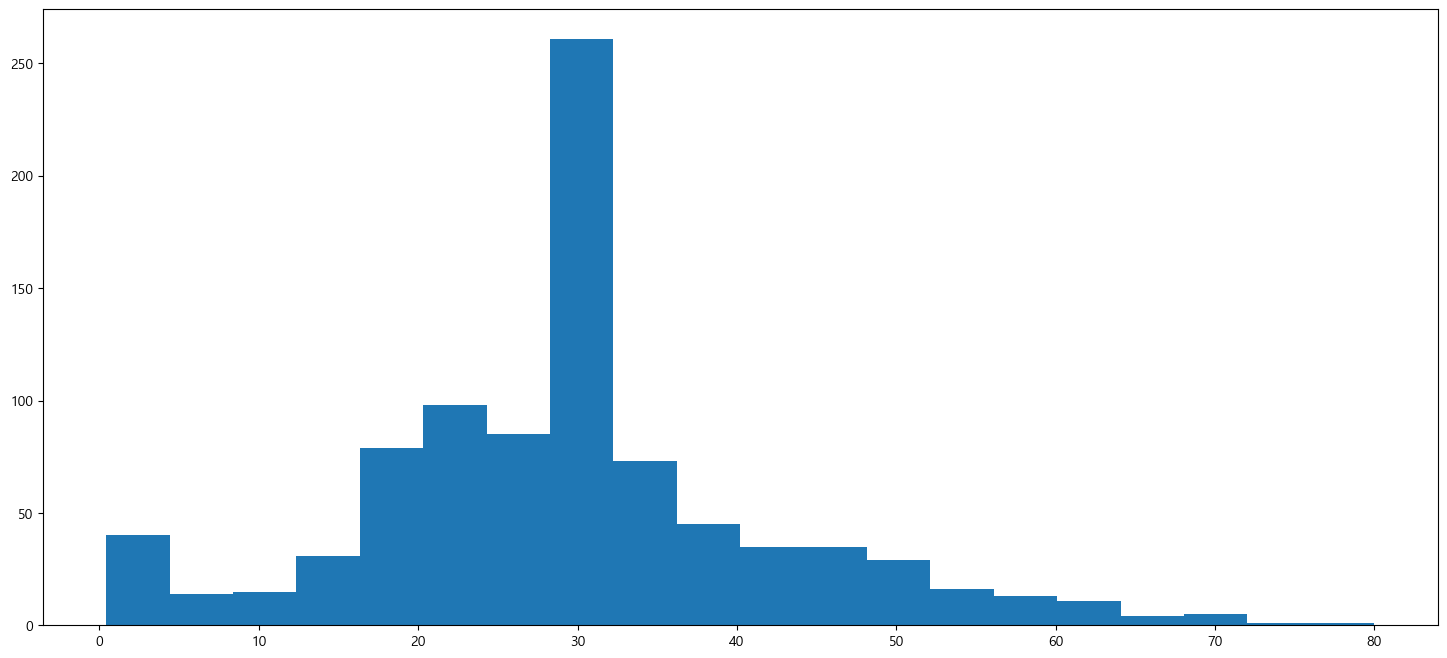

In [15]:
#승객들의 연령 분포

df['Age'].hist(bins=20,figsize=(18,8),grid=False)

In [16]:
#객실등급별 통계

df.groupby('Pclass1').mean()

,Survived,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass1,,,,,,,,,
0,0.305185,0.272593,0.727407,0.674074,0.325926,27.412963,0.557037,0.389630,15.580055
1,0.629630,0.000000,0.000000,0.564815,0.435185,37.089907,0.416667,0.356481,84.154687


In [17]:
df.groupby('Pclass2').mean()

,Survived,Pclass1,Pclass3,male,female,Age,SibSp,Parch,Fare
Pclass2,,,,,,,,,
0,0.360679,0.305516,0.694484,0.663366,0.336634,29.726082,0.554455,0.381895,35.208073
1,0.472826,0.000000,0.000000,0.586957,0.413043,29.884946,0.402174,0.380435,20.662183


In [18]:
df.groupby('Pclass3').mean()



,Survived,Pclass1,Pclass2,male,female,Age,SibSp,Parch,Fare
Pclass3,,,,,,,,,
0,0.557500,0.54,0.46,0.575000,0.425000,33.775625,0.410000,0.367500,54.948135
1,0.242363,0.00,0.00,0.706721,0.293279,26.486599,0.615071,0.393075,13.675550


c:\Python3.9.13\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


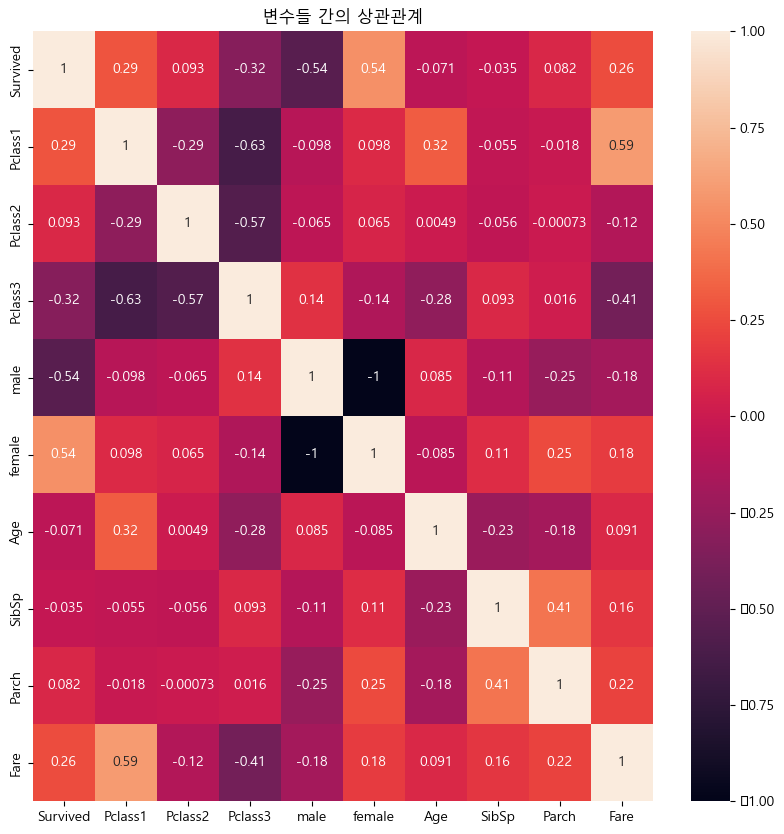

In [19]:
#상관관계 분석

plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, linecolor="white")

plt.title('변수들 간의 상관관계')

plt.show()

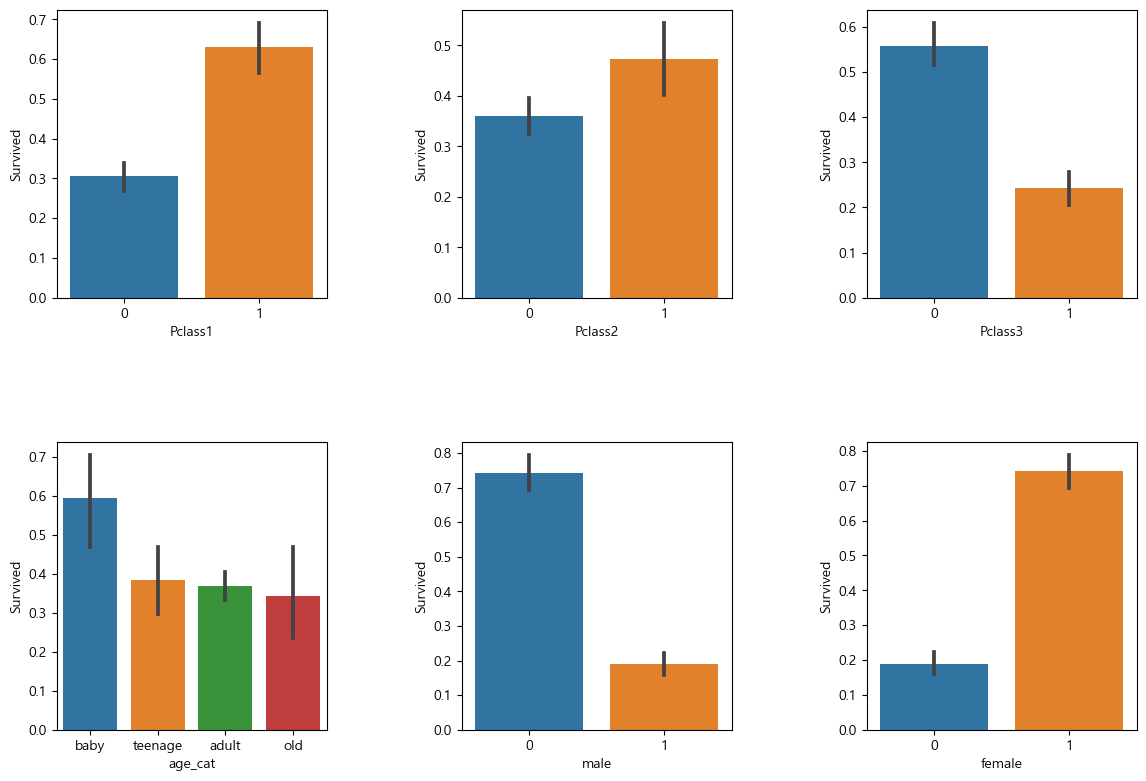

In [20]:
#연령대를 나눠서 분석

df['age_cat'] = pd.cut(df['Age'], bins=[0, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])

plt.figure(figsize=[12,8])

plt.subplot(231)

#막대 위의 세로선은 오차범위를 의미함(기본값은 ci=95)

sns.barplot(x='Pclass1', y='Survived', data=df)

plt.subplot(232)

sns.barplot(x='Pclass2', y='Survived', data=df)

plt.subplot(233)

sns.barplot(x='Pclass3', y='Survived', data=df)

plt.subplot(234)

sns.barplot(x='age_cat', y='Survived', data=df)

plt.subplot(235)

sns.barplot(x='male',y='Survived',data=df)

plt.subplot(236)

sns.barplot(x='female',y='Survived',data=df)

plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)

plt.show()

#1등석,2등석인 경우 생존률이 높음, 3등석은 생존률이 낮음

#baby와 female의 생존률이 높음

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10688\1112186586.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_10688\1112186586.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)


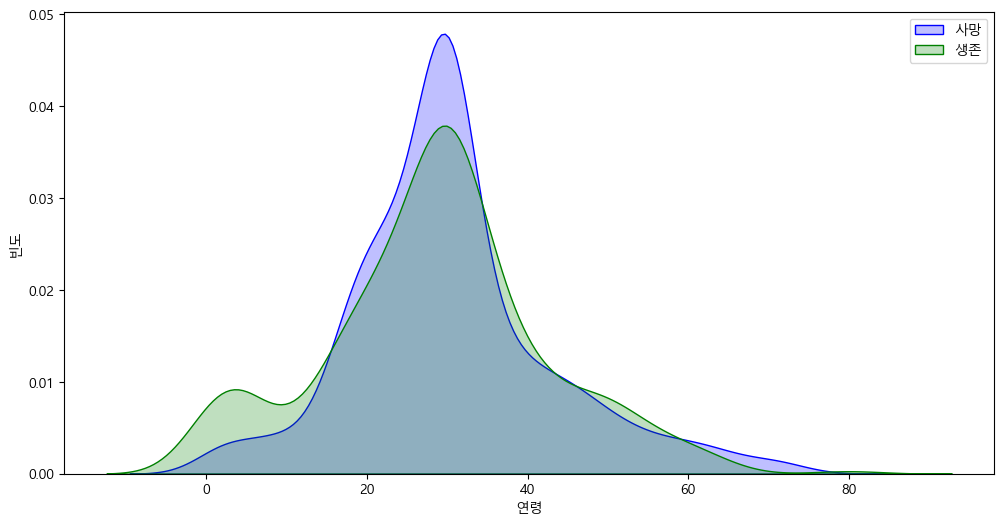

In [21]:
#나이 분포 곡선(어린아이들의 생존률이 상대적으로 높음)

f,ax = plt.subplots(figsize=(12,6))

#커널 밀도(kernel density) 그래프 : 히스토그램보다 부드러운 형태의 분포 곡선

g = sns.kdeplot(df["Age"][(df["Survived"] == 0)], ax = ax, color="blue", shade = True)

g = sns.kdeplot(df["Age"][(df["Survived"] == 1)], ax =g, color="green", shade= True)

g.set_xlabel("연령")

g.set_ylabel("빈도")

g.legend(["사망","생존"])

In [22]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
train_cols=df.columns[1:-1]

X=df[train_cols] #독립변수

y=df['Survived'] #종속변수

In [24]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

In [25]:
X = X_samp[train_cols] # 독립변수

y = y_samp["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=7)

In [27]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()
#           신경망 모형
model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu'))
#               output                  독립변수                        활성화
model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))   # 이진분류

#   input       hidden-1        hidden-2        hidden-3        output
#   9           128             64              64              1

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#              손실         최적화                      정확도

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,761
Trainable params: 13,761
Non-trainable params: 0
_________________________________________________________________


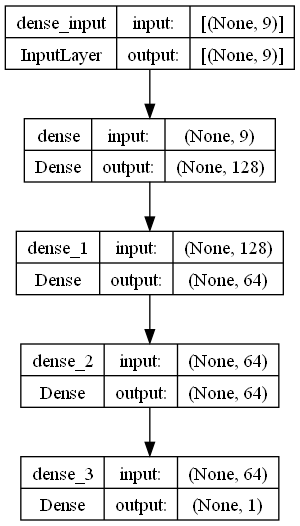

In [29]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

<Axes: >

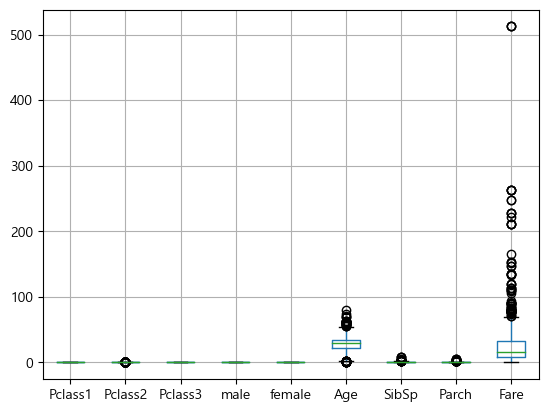

In [30]:
X_train.boxplot()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

# 넘파이 배열로 바뀜
# 넘파이 배열 => 데이터프레임

X_train_scaled=pd.DataFrame(X_train_scaled)

X_test_scaled=pd.DataFrame(X_test_scaled)

<Axes: >

C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


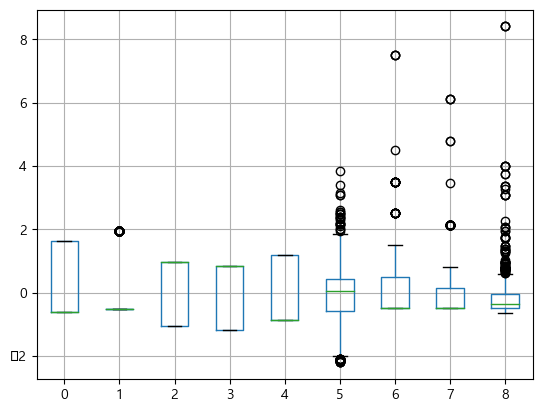

In [32]:
X_train_scaled.boxplot()

In [45]:
from joblib import dump

dump(scaler, 'c:/workspace3/model/scaler.model', compress=True)


['c:/workspace3/model/scaler.model']

Epoch 1/500
18/18 [==============================] - 1s 6ms/step - loss: 0.2100 - accuracy: 0.7258
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.7824
Epoch 3/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1410 - accuracy: 0.7916
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.8135
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1371 - accuracy: 0.7952
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1362 - accuracy: 0.8172
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.8099
Epoch 8/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1315 - accuracy: 0.8263
Epoch 9/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.8300
Epoch 10/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.8190
Epoch 11/

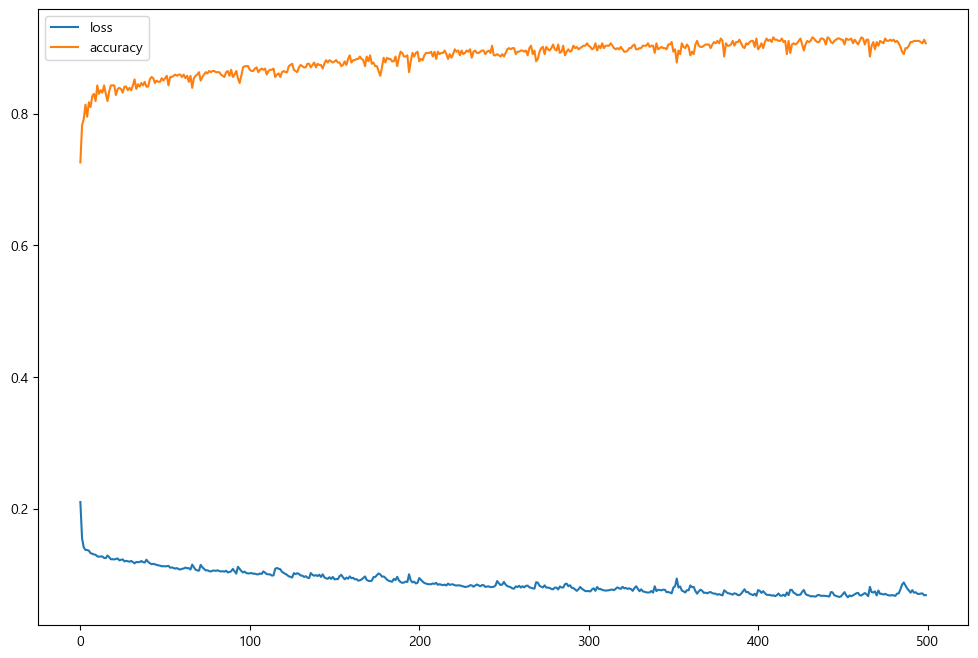

In [35]:
#모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=500)

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])

plt.plot(hist.history['accuracy'])

plt.legend(['loss','accuracy'])

plt.show()

In [36]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

18/18 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9141
[0.06515047699213028, 0.9140768051147461]
accuracy: 91.41%


In [37]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

5/5 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.7664
[0.20068351924419403, 0.7664233446121216]
accuracy: 76.64%


In [43]:
#1등석, 2등석, 3등석, 남성여부, 여성여부, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매2, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 2, 0, 50]]

#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]

#2등석, 여성, 40세, 형제자매1, 부모자녀1, 요금70
person3 = [[0, 1, 0, 0, 1, 40, 1, 1, 70]]

#스케일링을 해야 할 경우
person1=scaler.transform(person1)
person2=scaler.transform(person2)
person3=scaler.transform(person3)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

1/1 [==============================] - 0s 23ms/step
[[0.00281277]]
1/1 [==============================] - 0s 22ms/step
[[1.]]
1/1 [==============================] - 0s 19ms/step
[[1.]]


c:\Python3.9.13\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python3.9.13\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python3.9.13\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
#모형을 지정한 디렉토리에 저장

model.save('c:/workspace3/model/titanic/titanic.h5')

In [40]:
#netron 다운로드 및 테스트  

#https://github.com/lutzroeder/netron